In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# MNIST 데이터셋 불러오기
mnist=tf.keras.datasets.mnist
(train_X,train_Y), (test_X,test_Y)=mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


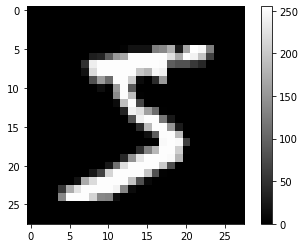

5


In [6]:
# 데이터 확인
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [12]:
# 데이터 정규화
train_X=train_X/255.0 # tain_X는 0~255의 그레이스케일 값임 -> 0에서 1사이로 정규화
test_X=test_X/255.0

train_Y_onehot=tf.keras.utils.to_categorical(train_Y,num_classes=10)
test_Y_onehot=tf.keras.utils.to_categorical(test_Y,num_classes=10)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
# MNIST 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

history=model.fit(train_X,train_Y_onehot,epochs=5,validation_split=0.25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3988 - accuracy: 0.8831 - val_loss: 0.1199 - val_accuracy: 0.9632
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0944 - accuracy: 0.9708 - va

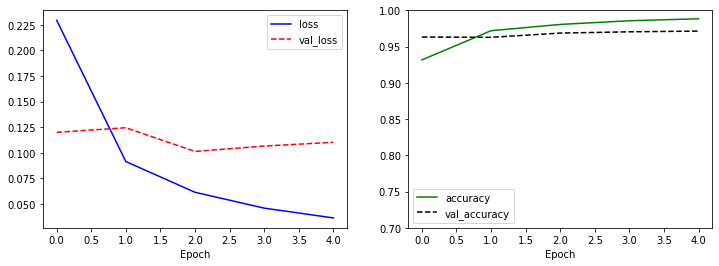

In [9]:
# 다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

In [10]:
# MNIST 분류 모델 평가
model.evaluate(test_X,test_Y_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9740


[0.0984230563044548, 0.9739999771118164]

In [19]:
model.predict(test_X)

array([[0.05421307, 0.04733187, 0.09132247, ..., 0.08545938, 0.16587825,
        0.07801257],
       [0.05825213, 0.04630571, 0.09223296, ..., 0.06996331, 0.17149617,
        0.06871393],
       [0.05400797, 0.04522828, 0.08741959, ..., 0.0759962 , 0.16672204,
        0.07372458],
       ...,
       [0.05177635, 0.04578429, 0.08924796, ..., 0.07966711, 0.17586064,
        0.07593168],
       [0.05492195, 0.04534444, 0.09177291, ..., 0.07668212, 0.18243931,
        0.06829716],
       [0.05820491, 0.04781613, 0.09791111, ..., 0.07710858, 0.16928744,
        0.06865   ]], dtype=float32)